# Feather Fall: Forecasting Conservation Risk Levels for Birds in India

## Problem Statement 
##### India is home to over 1,300 bird species, many of which are increasingly threatened by habitat loss, climate change, and human activity. With conservation resources limited, it's critical to prioritize efforts toward species that are most at risk. However, determining which species need immediate attention remains a significant challenge.
##### This project aims to build a machine learning model that classifies Indian bird species into three conservation concern levels — Low, Moderate, or High — using ecological traits, population trends, migratory behavior, diet, and other biological indicators. By leveraging data-driven predictions, this tool supports early identification of vulnerable species, enabling conservationists and policymakers to take targeted, proactive action. Through this approach, we seek to enhance the effectiveness of conservation planning and contribute to preserving India's avian biodiversity.

## Goal 
##### To support effective bird conservation in India by identifying species at higher conservation risk through predictive modeling, enabling early intervention and better resource allocation.

## Project Objective 
##### To build a machine learning model that classifies Indian bird species into conservation concern levels (Low, Moderate, High) using ecological features such as population trends, diet type, migratory behavior, and distribution range. This model will help prioritize species and regions for focused conservation action

#### Import Libraries 

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels

In [181]:
import plotly.graph_objects as go
from plotly.offline import iplot


import cufflinks as cf #connect pandas with plotly for interactive plotting
import plotly.express as px #A high-level API for quick interactive plotting 
%matplotlib inline# to show up directly to jupyter nb

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)#plotly work in jupyter nb
cf.go_offline()#to make everything work locally
cf.set_config_file(world_readable=False,offline=True)


UsageError: unrecognized arguments: to show up directly to jupyter nb


## Load the Data

In [184]:
birds_df = pd.read_csv("Birds_info.csv")

In [186]:
birds_df.head()

,Serial Number,Common Name (India Checklist),Scientific Name (India Checklist),Common Name (eBird 2018),Common Name (eBird 2019),Group,Order,Family,IUCN Status,WLPA Schedule,...,Migratory Status,Diet,Waterbirds,Raptors,Scavengers,Raptors Composite,Waterbirds Composite,Habitat Composite,Endemicity Composite,Diet Composite
0,1,Fulvous Whistling Duck,Dendrocygna bicolor,Fulvous Whistling-Duck,Fulvous Whistling-Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-I,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
1,2,Lesser Whistling Duck,Dendrocygna javanica,Lesser Whistling-Duck,Lesser Whistling-Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,Resident-Non-Endemics,NaN
2,3,Bar-headed Goose,Anser indicus,Bar-headed Goose,Bar-headed Goose,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Migratory-Local,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
3,4,Greylag Goose,Anser anser,Graylag Goose,Graylag Goose,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Migratory-Long-Distance,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
4,5,Comb Duck,Sarkidiornis melanotos,Knob-billed Duck,Knob-billed Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,Resident-Non-Endemics,NaN


In [188]:
birds_name = pd.read_csv("Birds_name_state_wise1.csv")
birds_name.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,Gujrat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,...,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Fulvous Whistling Duck
1,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,Bar-headed Goose,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,...,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,Ruddy Shelduck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,Lesser Whistling Duck
2,Bar-headed Goose,Bar-headed Goose,Bar-headed Goose,Bar-headed Goose,Greylag Goose,Greylag Goose,Knob-billed Duck,Bar-headed Goose,Greylag Goose,Greylag Goose,...,Bar-headed Goose,Greylag Goose,Greylag Goose,Gadwall,Bar-headed Goose,Bar-headed Goose,Knob-billed Duck,Greylag Goose,Greylag Goose,Bar-headed Goose
3,Knob-billed Duck,Greylag Goose,Greylag Goose,Greylag Goose,Knob-billed Duck,Knob-billed Duck,Ruddy Shelduck,Greylag Goose,Knob-billed Duck,Knob-billed Duck,...,Greylag Goose,Knob-billed Duck,Knob-billed Duck,Eurasian Wigeon,Greylag Goose,Greylag Goose,Cotton Pygmy Goose,Knob-billed Duck,Knob-billed Duck,Greylag Goose
4,Ruddy Shelduck,Ruddy Shelduck,Knob-billed Duck,Knob-billed Duck,Ruddy Shelduck,Ruddy Shelduck,Cotton Pygmy Goose,Knob-billed Duck,Ruddy Shelduck,Ruddy Shelduck,...,Knob-billed Duck,Ruddy Shelduck,Ruddy Shelduck,Mallard,Knob-billed Duck,Knob-billed Duck,Garganey,Ruddy Shelduck,Ruddy Shelduck,Knob-billed Duck


#### Understanding the Data

In [191]:
type(birds_df)

pandas.core.frame.DataFrame

In [193]:
type(birds_name)

pandas.core.frame.DataFrame

In [195]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Serial Number                                         867 non-null    int64  
 1   Common Name (India Checklist)                         867 non-null    object 
 2   Scientific Name (India Checklist)                     867 non-null    object 
 3   Common Name (eBird 2018)                              867 non-null    object 
 4   Common Name (eBird 2019)                              867 non-null    object 
 5   Group                                                 865 non-null    object 
 6   Order                                                 865 non-null    object 
 7   Family                                                865 non-null    object 
 8   IUCN Status                                           867 no

In [197]:
birds_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Andhra Pradesh     411 non-null    object
 1   Arunachal Pradesh  594 non-null    object
 2   Assam              565 non-null    object
 3   Bihar              313 non-null    object
 4   Chattisgarh        363 non-null    object
 5   Delhi              337 non-null    object
 6   Goa                400 non-null    object
 7   Gujrat             412 non-null    object
 8   Haryana            447 non-null    object
 9   Himachal Pradesh   507 non-null    object
 10  Jammu & kashmir    421 non-null    object
 11  Jharkhand          299 non-null    object
 12  Karnataka          452 non-null    object
 13  Kerala             425 non-null    object
 14  Madhya Pradesh     392 non-null    object
 15  Maharashtra        459 non-null    object
 16  Manipur            431 non-null    object
 1

In [199]:
birds_df.describe()

,Serial Number,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)"
count,867.000000,487.000000,487.000000,677.000000,677.000000,856.000000,856.000000
mean,434.000000,-23.771736,35.660908,-1.508480,14.041841,35.951108,0.075573
std,250.425638,40.640144,35.405406,10.239282,21.119122,50.519018,0.035236
min,1.000000,-97.040887,0.914415,-24.033897,1.185877,0.000900,0.000000
25%,217.500000,-53.361035,15.724150,-5.989720,4.787951,5.653592,0.059075
50%,434.000000,-30.045127,26.164983,-2.535760,8.648848,13.659506,0.074500
75%,650.500000,-1.467697,42.704433,1.640885,16.217987,37.720139,0.090525
max,867.000000,171.255544,368.877213,191.156998,400.802847,224.354113,0.441700


In [201]:
birds_df.shape

(867, 33)

In [203]:
birds_name.shape

(693, 30)

## Data Cleaning

##### Dropping Unwanted Columns

In [207]:
birds_df = birds_df.drop(['Serial Number',
                          'Common Name (India Checklist)',
                          'Scientific Name (India Checklist)',
                          'Common Name (eBird 2018)',
                          'Order',
                          'Family',
                          'Distribution Range Size (units of 10,000 sq. km.)',
                          'Distribution Range Size CI (units of 10,000 sq. km.)',
                          'Diet Composite',
                          'Assessed Primarily Based On',
                          'Waterbirds Composite',
                          'Raptors Composite'                          
                         ] 
                         ,axis = 1)

##### Replacing Columns Name

In [210]:
birds_df.rename(columns={
    'Common Name (eBird 2019)': 'bird_name',
    'Group': 'group',
    'IUCN Status': 'iucn_status',
    'WLPA Schedule': 'wlpa_schedule',
    'Analysed Long-term': 'analysed_long_term',
    'Analysed Current': 'analysed_current',
    'Long-term Trend (%)': 'long_term_trend',
    'Long-term Trend CI (%)': 'long_term_trend_ci',
    'Current Annual Change (%)': 'current_annual_change',
    'Current Annual Change CI (%)': 'current_annual_change_ci',
    'Long-term Status': 'long_term_status',
    'Current Status': 'current_status',
    'Distribution Status': 'distribution_status',
    'Status of Conservation Concern': 'status_of_conservation_concern',
    'Migratory Status': 'migratory_status',
    'Diet': 'diet',
    'Waterbirds': 'waterbirds',
    'Raptors': 'raptors',
    'Scavengers': 'scavengers',
    'Habitat Composite': 'habitat_type',
    'Endemicity Composite': 'endemicity_type',
}, inplace=True)

##### Checking Duplicate

In [213]:
birds_df[birds_df.duplicated()]

,bird_name,group,iucn_status,wlpa_schedule,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci,...,current_status,distribution_status,status_of_conservation_concern,migratory_status,diet,waterbirds,raptors,scavengers,habitat_type,endemicity_type


##### Checking Null Values 

In [216]:
birds_df.isna().sum()

bird_name                           0
group                               2
iucn_status                         0
wlpa_schedule                       0
analysed_long_term                382
analysed_current                  192
long_term_trend                   380
long_term_trend_ci                380
current_annual_change             190
current_annual_change_ci          190
long_term_status                    5
current_status                      5
distribution_status                 5
status_of_conservation_concern      5
migratory_status                    0
diet                                9
waterbirds                        741
raptors                           812
scavengers                        857
habitat_type                        0
endemicity_type                   450
dtype: int64

#### filling null value with mode

In [219]:
mode_fill_cols = [
    'group',
    'long_term_status', 
    'current_status',
    'distribution_status',
    'status_of_conservation_concern', 
    'diet'
]
for col in mode_fill_cols:
    birds_df[col] = birds_df[col].fillna(birds_df[col].mode()[0])

#### filling null value with zero

In [222]:
zero_fill_cols = [
    'analysed_long_term',
    'analysed_current',
    'long_term_trend',
    'long_term_trend_ci',
    'current_annual_change',
    'current_annual_change_ci',
    'waterbirds',
    'raptors',
    'scavengers'
]
for col in zero_fill_cols:
    birds_df[col] = birds_df[col].fillna(0)

In [224]:
birds_df['endemicity_type']=birds_df['endemicity_type'].fillna("Unknown")
birds_df['endemicity_type'].isna().sum()

0

In [226]:
birds_df.isna().sum()

bird_name                         0
group                             0
iucn_status                       0
wlpa_schedule                     0
analysed_long_term                0
analysed_current                  0
long_term_trend                   0
long_term_trend_ci                0
current_annual_change             0
current_annual_change_ci          0
long_term_status                  0
current_status                    0
distribution_status               0
status_of_conservation_concern    0
migratory_status                  0
diet                              0
waterbirds                        0
raptors                           0
scavengers                        0
habitat_type                      0
endemicity_type                   0
dtype: int64

#### Preprocessing Data

In [229]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bird_name                       867 non-null    object 
 1   group                           867 non-null    object 
 2   iucn_status                     867 non-null    object 
 3   wlpa_schedule                   867 non-null    object 
 4   analysed_long_term              867 non-null    object 
 5   analysed_current                867 non-null    object 
 6   long_term_trend                 867 non-null    float64
 7   long_term_trend_ci              867 non-null    float64
 8   current_annual_change           867 non-null    float64
 9   current_annual_change_ci        867 non-null    float64
 10  long_term_status                867 non-null    object 
 11  current_status                  867 non-null    object 
 12  distribution_status             867 

##### Changing Data Types of Columns

In [232]:
# Converting Columns to Binary values 
binary_indices = [4,5,16,17,18]
binary_cols = [birds_df.columns[i] for i in binary_indices]
for col in binary_cols:
    birds_df[col] = birds_df[col].apply(lambda x: 1 if str(x).strip().upper() == 'X' else 0)


In [234]:
def get_bird_type(row):
    if row['scavengers'] == 1 & row['raptors']==1:
        return 'scavenger'
    elif row['raptors'] == 1:
        return 'raptor'
    elif row['waterbirds'] == 1:
        return 'waterbird'
    
    else:
        return '0'

# Create the new column
birds_df['bird_type'] = birds_df.apply(get_bird_type, axis=1)

# Now you can drop the old columns if not needed
birds_df.drop(columns=['raptors', 'waterbirds', 'scavengers'], inplace=True)


In [236]:
# Converting Object Columns to Category
category_indices = [1, 2, 3,10,11,12,13,14,15,16,17,18]
cols_to_category = [birds_df.columns[i] for i in category_indices]
birds_df[cols_to_category] = birds_df[cols_to_category].astype('category')


In [238]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   bird_name                       867 non-null    object  
 1   group                           867 non-null    category
 2   iucn_status                     867 non-null    category
 3   wlpa_schedule                   867 non-null    category
 4   analysed_long_term              867 non-null    int64   
 5   analysed_current                867 non-null    int64   
 6   long_term_trend                 867 non-null    float64 
 7   long_term_trend_ci              867 non-null    float64 
 8   current_annual_change           867 non-null    float64 
 9   current_annual_change_ci        867 non-null    float64 
 10  long_term_status                867 non-null    category
 11  current_status                  867 non-null    category
 12  distribution_status   

In [240]:
import pandas as pd

# Suppose your DataFrame is named `df`
birds_df.to_excel('my_data.xlsx', index=False)


#### Sorting the Dataset

In [242]:
birds_df=birds_df.sort_values(by='bird_name').reset_index(drop=True)

In [243]:
birds_name=birds_name.apply(lambda col:sorted(map(str, col)))

In [244]:
# Step 1: Clean bird names in birds_df (master list)
birds_df['bird_name'] = (
    birds_df['bird_name'].str.strip().str.lower().str.replace('-', ' ').str.replace(r'\s+', ' ', regex=True)
)

# Step 2: Clean statewise bird names
birds_name.columns = birds_name.columns.str.strip()
birds_name = birds_name.apply(lambda col: (col.astype(str).str.strip().str.lower().str.replace('-', ' ').str.replace(r'\s+', ' ', regex=True)
))

# Step 3: Create correction_dict by fuzzy matching all unique names once
unique_names = pd.unique(birds_name.values.ravel())
unique_names = [name for name in unique_names if name and name != 'nan']

correction_dict = {}
master_list = birds_df['bird_name'].tolist()

for name in unique_names:
    match_result = process.extractOne(name, master_list, scorer=fuzz.token_sort_ratio)
    if match_result:
        match_name, score = match_result[0], match_result[1]
        if score >= 90:
            correction_dict[name] = match_name
        else:
            correction_dict[name] = None  # low score
    else:
        correction_dict[name] = None  # no match

# Step 4: Apply corrected names to birds_name
birds_name_corrected = birds_name.apply(lambda col: col.map(lambda x: correction_dict.get(x, None)))
# Step 5: Build statewise sets from corrected names
statewise_sets = {
    state: set(birds_name_corrected[state].dropna().unique())
    for state in birds_name_corrected.columns
}

# Step 6: Clean bird names in main data for matching
birds_df['bird_name'] = (
    birds_df['bird_name']
    .str.strip()
    .str.lower()
    .str.replace('-', ' ')
    .str.replace(r'\s+', ' ', regex=True)
)

# Step 7: Add binary presence columns
for state, birds in statewise_sets.items():
    birds_df[state] = birds_df['bird_name'].map(lambda x: 1 if x in birds else 0)

# Step 8: Show output
print(birds_df[['bird_name'] + list(statewise_sets.keys())].head())

               bird_name  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  \
0       abbott's babbler               1                  1      1      0   
1  aberrant bush warbler               0                  1      1      0   
2   alexandrine parakeet               1                  1      1      1   
3        alpine accentor               0                  1      0      0   
4           alpine swift               1                  0      0      0   

   Chattisgarh  Delhi  Goa  Gujrat  Haryana  ...  Odisha  Punjab  Rajasthan  \
0            0      0    0       0        0  ...       1       0          0   
1            0      0    0       0        0  ...       0       0          0   
2            1      1    1       1        1  ...       1       1          1   
3            0      0    0       0        0  ...       0       0          0   
4            0      0    1       1        1  ...       0       1          1   

   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  Utta

## EDA (Exploratory Data Analysis)

### IUCN Status Distribution

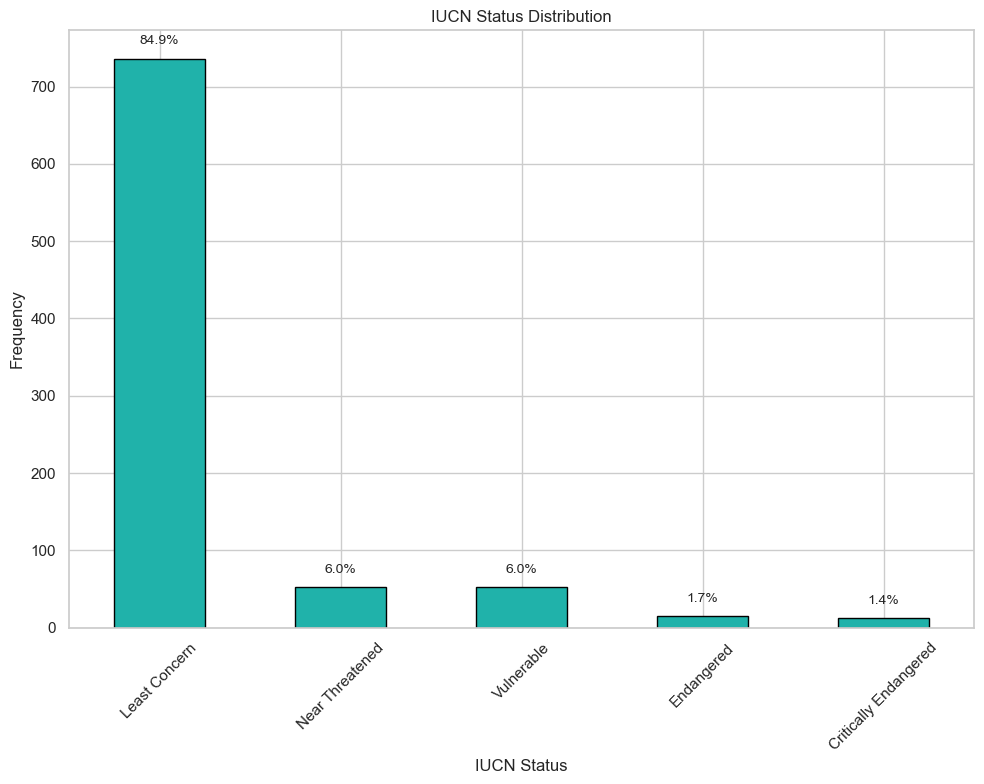

In [250]:
# Value counts and percentages
status_counts = birds_df['iucn_status'].value_counts()
status_percent = birds_df['iucn_status'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(10, 8))
ax = status_counts.plot(kind='bar', edgecolor='black', color='lightseagreen')
plt.title('IUCN Status Distribution')
plt.xlabel('IUCN Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate percentages
for i, (count, percent) in enumerate(zip(status_counts, status_percent)):
    ax.text(i, count + max(status_counts)*0.02, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

##### About 84.9% of species are Least concern (These species are not currently at significant risk of extinction.) and 1.4% are Critically Endangered (These are at extremely high risk of extinction in the immediate future.)

In [252]:
birds_df['wlpa_schedule'].value_counts()

wlpa_schedule
Schedule-IV    786
Schedule-I      80
Schedule-V       1
Name: count, dtype: int64

- Schedule I: Endangered species needing full protection.
- Schedule IV: Non-endangered but protected species.
- Schedule V: Vermin—can be hunted without legal consequences.


### WLPA Schedule Distribution

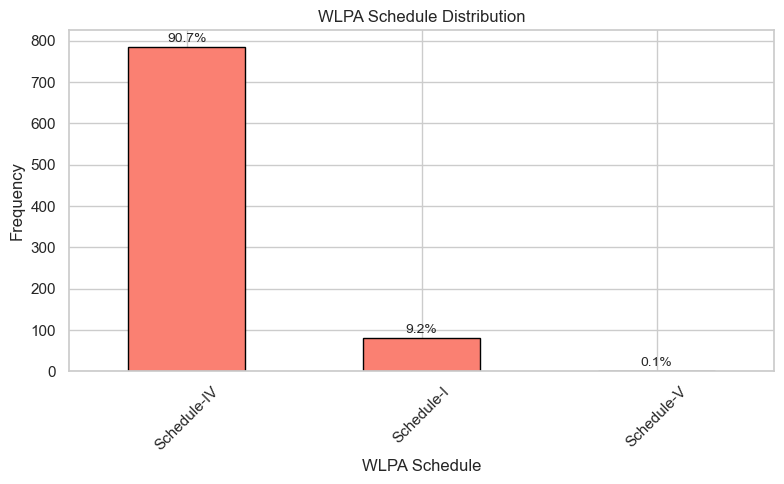

In [256]:
# Calculate counts and percentages
schedule_counts = birds_df['wlpa_schedule'].value_counts()
schedule_percent = birds_df['wlpa_schedule'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8, 5))
ax = schedule_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('WLPA Schedule Distribution')
plt.xlabel('WLPA Schedule')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate percentages
for i, (count, percent) in enumerate(zip(schedule_counts, schedule_percent)):
    ax.text(i, count + 5, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [258]:
pd.crosstab(birds_df['iucn_status'],birds_df['wlpa_schedule'])

wlpa_schedule,Schedule-I,Schedule-IV,Schedule-V
iucn_status,,,
Critically Endangered,8,4,0
Endangered,6,9,0
Least Concern,39,696,1
Near Threatened,11,41,0
Vulnerable,16,36,0


### IUCN Status vs WLPA Schedule

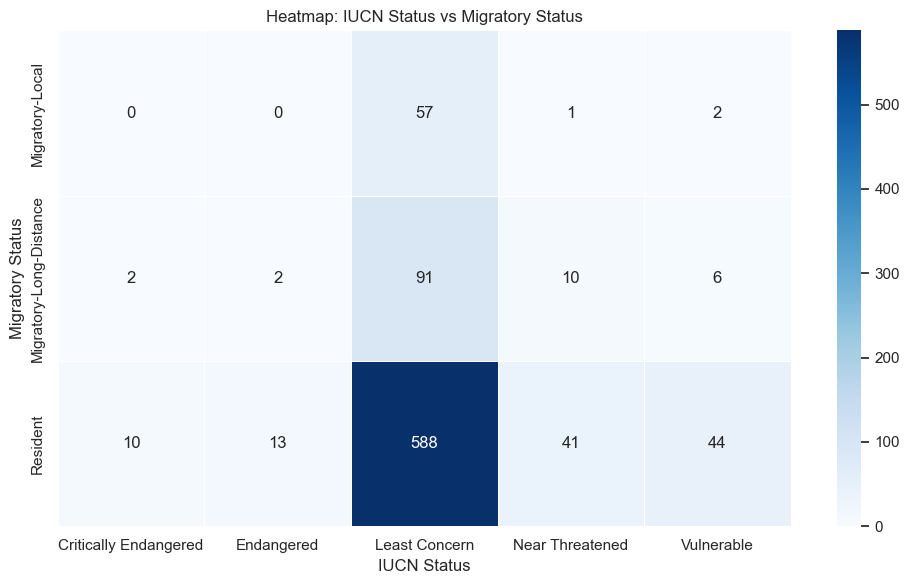

In [261]:
heatmap_data = pd.crosstab(birds_df['migratory_status'], birds_df['iucn_status'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title("Heatmap: IUCN Status vs Migratory Status")
plt.xlabel("IUCN Status")
plt.ylabel("Migratory Status")
plt.tight_layout()
plt.show()

#### Most species regardless of migratory status fall under Least Concern, with Resident species making up the majority in all categories, including the most threatened ones.

### Comparison of Analysed Long Term vs Current

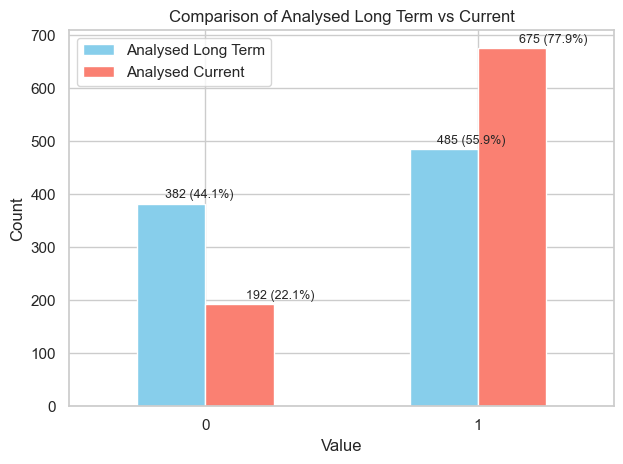

In [265]:
# Value counts
long_term = birds_df['analysed_long_term'].value_counts().sort_index()
current = birds_df['analysed_current'].value_counts().sort_index()

# Combine into a DataFrame
df_plot = pd.DataFrame({
    'Analysed Long Term': long_term,
    'Analysed Current': current
})

# Plot
ax = df_plot.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Analysed Long Term vs Current')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add value and percentage labels
total_long = long_term.sum()
total_current = current.sum()

for i, (lt, ct) in enumerate(zip(long_term, current)):
    plt.text(i - 0.15, lt + 10, f'{lt} ({lt/total_long:.1%})', fontsize=9)
    plt.text(i + 0.15, ct + 10, f'{ct} ({ct/total_current:.1%})', fontsize=9)

plt.tight_layout()
plt.show()

In [266]:
birds_df['long_term_trend']

0       0.000000
1       0.000000
2      56.162886
3       0.000000
4     -45.705560
         ...    
862     0.000000
863   -37.021236
864     0.000000
865   -47.444150
866   -15.219793
Name: long_term_trend, Length: 867, dtype: float64

##### There’s a shift from category 0 towards category 1 in the Current analysis compared to the Long Term analysis.

### Diet Type Distribution Across Migratory Status

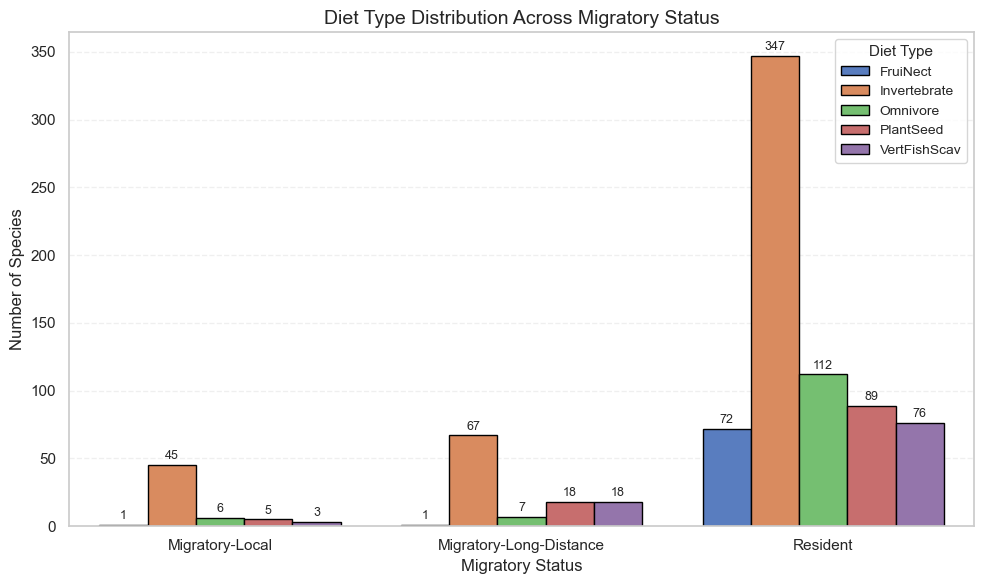

In [271]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=birds_df, x='migratory_status', hue='diet', palette='muted', edgecolor='black')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

plt.title('Diet Type Distribution Across Migratory Status', fontsize=14)
plt.xlabel('Migratory Status', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.legend(title='Diet Type', fontsize=10, title_fontsize=11)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#### Regardless of migratory status, Invertebrate feeding is the most common diet type, but Resident species have a much more diverse diet compared to migratory species.

### Distribution of long term trends

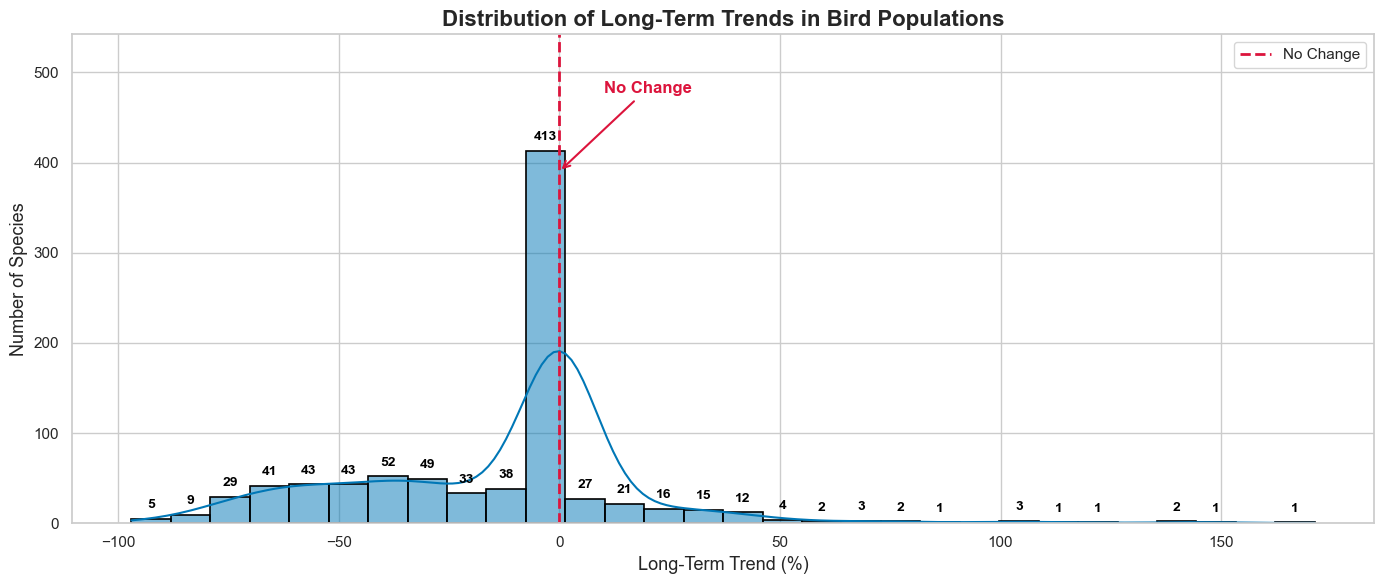

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply theme
sns.set(style="whitegrid")

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot histogram with KDE
ax = sns.histplot(
    birds_df['long_term_trend'],
    bins=30,
    kde=True,
    color="#0077b6",
    edgecolor="black",
    linewidth=1.2
)

# Vertical line at 0 (no change)
plt.axvline(x=0, color='crimson', linestyle='--', linewidth=2, label='No Change')

# Get current limits
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.25)  # Add vertical space for labels

# Add bar value annotations
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        plt.text(
            x, height + y_max * 0.02,
            f"{int(height)}", 
            ha='center', va='bottom',
            fontsize=10, fontweight='semibold', color='black'
        )

# Add annotation for no change line
plt.annotate(
    'No Change',
    xy=(0, y_max * 0.9),
    xytext=(10, y_max * 1.1),
    arrowprops=dict(arrowstyle='->', color='crimson', lw=1.5),
    fontsize=12,
    color='crimson',
    fontweight='bold'
)

# Titles and labels
plt.title('Distribution of Long-Term Trends in Bird Populations', fontsize=16, fontweight='bold')
plt.xlabel('Long-Term Trend (%)', fontsize=13)
plt.ylabel('Number of Species', fontsize=13)
plt.legend()

plt.tight_layout()
plt.show()


#### Most bird species have stable populations, but declining trends are more common than strong increases, which is a concern for conservation.

## Long-Term Trend vs Confidence Interval

In [278]:
birds_df['long_term_trend_ci']

0       0.000000
1       0.000000
2      37.645496
3       0.000000
4      21.179219
         ...    
862     0.000000
863    14.777688
864     0.000000
865    10.869552
866    18.918924
Name: long_term_trend_ci, Length: 867, dtype: float64

In [281]:
def categorize_trend(val):
    if val > 5:
        return 'Increasing'
    elif val < -5:
        return 'Decreasing'
    else:
        return 'Stable'

birds_df['long_term_trend_category'] = birds_df['long_term_trend'].apply(categorize_trend)


In [283]:
birds_df['long_term_trend_category']

0          Stable
1          Stable
2      Increasing
3          Stable
4      Decreasing
          ...    
862        Stable
863    Decreasing
864        Stable
865    Decreasing
866    Decreasing
Name: long_term_trend_category, Length: 867, dtype: object

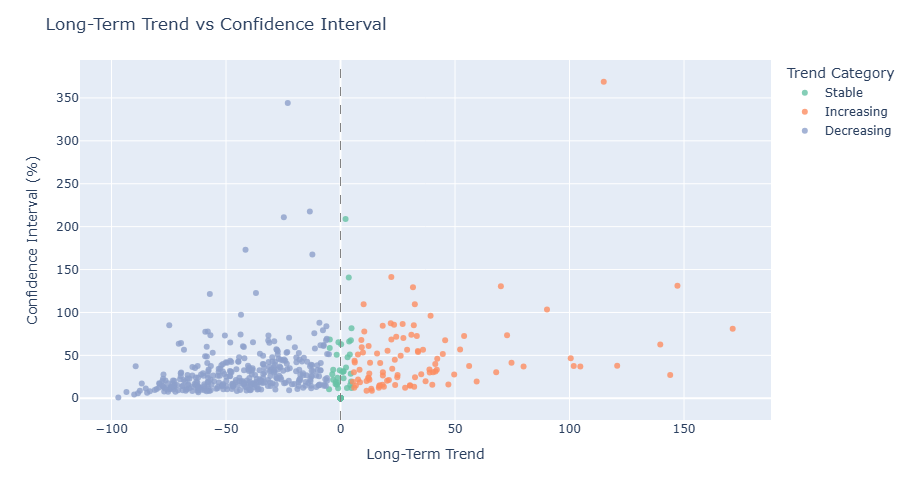

In [285]:
fig = px.scatter( birds_df, x='long_term_trend', y='long_term_trend_ci',
    color='long_term_trend_category',
    color_discrete_sequence=px.colors.qualitative.Set2,
    opacity=0.8,
    size_max=10,)

fig.update_layout(title='Long-Term Trend vs Confidence Interval',xaxis_title='Long-Term Trend',yaxis_title='Confidence Interval (%)',
    legend_title='Trend Category',
    width=800,
    height=500)
fig.add_vline(x=0, line_width=1, line_dash='dash', line_color='gray')

fig.show()


### Most species have moderate confidence levels, but there’s a clear split — many species are declining, fewer are increasing, and only a small proportion are stable.

## Population Trend Category vs Conservation Concern

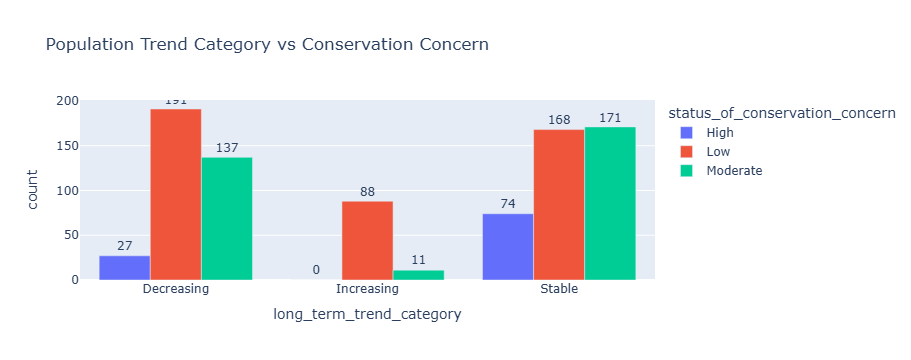

In [289]:
# Create a grouped bar chart
fig = px.bar(
    birds_df.groupby(["long_term_trend_category", "status_of_conservation_concern"])
      .size()
      .reset_index(name="count"),
    x="long_term_trend_category",
    y="count",
    color="status_of_conservation_concern",
    barmode="group",
    text="count",
    title="Population Trend Category vs Conservation Concern"
)

fig.update_traces(textposition='outside')
fig.show()


#### High conservation concern appears mostly for stable populations and rarely for decreasing populations, which could suggest that "concern" status isn’t solely based on population trend.

## Top 10 Bird Groups - Proportion of Species

In [293]:
# Unique no  of birds group 
birds_df['group'].nunique()

81

In [295]:
# Top 10 Birds Group 
top_groups = birds_df['group'].value_counts().head(10).reset_index()
top_groups.columns = ['Bird Group', 'Count']
print(top_groups)

                                     Bird Group  Count
0                         Old World Flycatchers     72
1                   Laughingthrushes and Allies     52
2                                    Shorebirds     50
3                   Vultures, Hawks, and Allies     48
4                     Grouse, Quail, and Allies     32
5                                   Woodpeckers     28
6                             Pigeons and Doves     26
7                                 Leaf Warblers     25
8  Tree-Babblers, Scimitar-Babblers, and Allies     22
9                                     Waterfowl     22


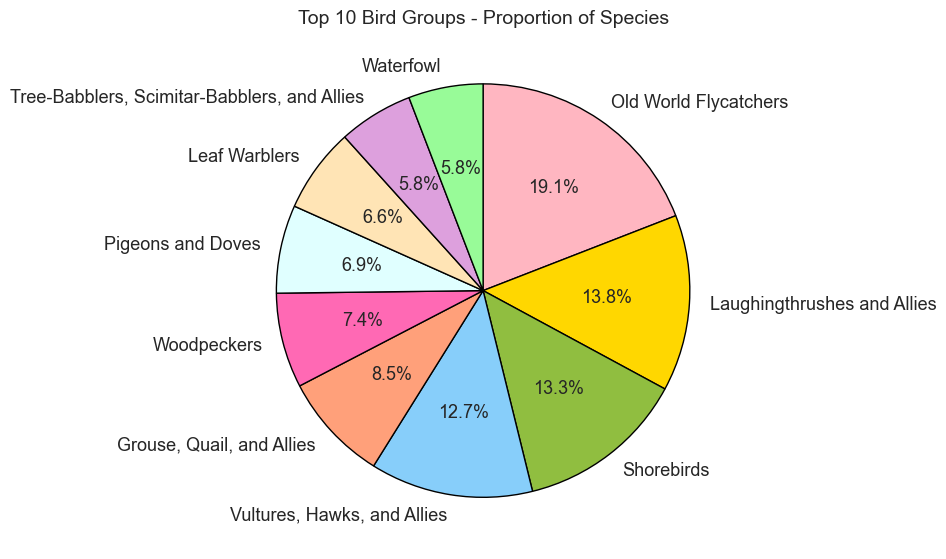

In [297]:
colors = [
    '#FFB6C1', '#FFD700', '#90BE40', '#87CEFA', '#FFA07A',
    '#FF69B4', '#E0FFFF', '#FFE4B5', '#DDA0DD', '#98FB98'
]
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    top_groups['Count'],
    labels=top_groups['Bird Group'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock= False,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Beautify text
for text in texts:
    text.set_fontsize(13)
for autotext in autotexts:
    autotext.set_fontsize(13)


plt.title('Top 10 Bird Groups - Proportion of Species', fontsize=14)
plt.tight_layout()
plt.show()


#### Old World Flycatchers have the highest proportion and Watefowl, Tree-Babblers, Scimitar-Babblers and Allies have the lowest proportion

### Diet vs WLPA schedule

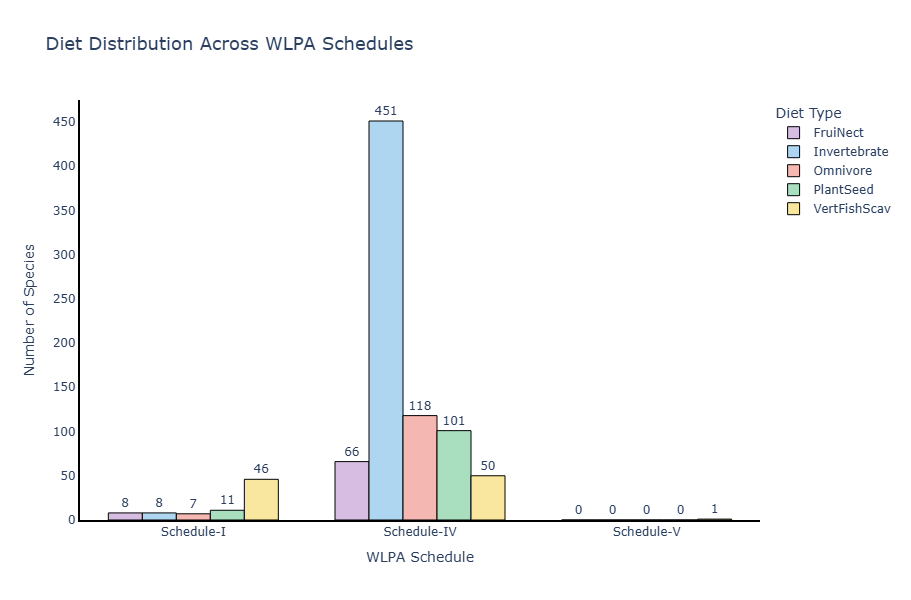

In [305]:
import plotly.express as px

# Step 1: Group data
wlpa_diet_df = birds_df.groupby(['wlpa_schedule', 'diet']).size().reset_index(name='count')

# Step 2: Limit to top 5 most common diet types for clear coloring
top5_diets = wlpa_diet_df.groupby('diet')['count'].sum().sort_values(ascending=False).head(5).index
wlpa_diet_df = wlpa_diet_df[wlpa_diet_df['diet'].isin(top5_diets)]

# Step 3: Custom pastel colors for 5 diet types
pastel_colors = {
    top5_diets[0]: '#AED6F1',  # light blue
    top5_diets[1]: '#F5B7B1',  # soft red
    top5_diets[2]: '#A9DFBF',  # mint green
    top5_diets[3]: '#F9E79F',  # pastel yellow
    top5_diets[4]: '#D7BDE2'   # light purple
}

# Step 4: Plot
fig = px.bar(
    wlpa_diet_df,
    x='wlpa_schedule',
    y='count',
    color='diet',
    barmode='group',
    title='Diet Distribution Across WLPA Schedules',
    color_discrete_map=pastel_colors,
    text='count'  #  Add value labels
)

# Step 5: Beautify layout
fig.update_traces(
    textposition='outside',
    marker_line_width=1,
    marker_line_color='black'
)
fig.update_xaxes(
    showline=True,      # Show x-axis line
    linewidth=2,        # Line width
    linecolor='black',  # Line color
    showgrid=False,     # Hide vertical grid lines
    zeroline=False
)

fig.update_yaxes(
    showline=True,      # Show y-axis line
    linewidth=2,
    linecolor='black',
    showgrid=False,     # Hide horizontal grid lines
    zeroline=False
)

fig.update_layout(
     width=950,
    height=600,
    xaxis_title='WLPA Schedule',
    yaxis_title='Number of Species',
    title_font_size=18,
    legend_title='Diet Type',
    bargap=0.25,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        orientation='v',yanchor='top',
        y=1.0,
        xanchor='left',
        x=1.02
    )
)

fig.show()

##### - Schedule I: Endangered species needing full protection.
##### - Schedule IV: Non-endangered but protected species.
##### - Schedule V: Vermin can be hunted without legal consequences.

##### VertFishScav has the highest no in Schedule -I and V but in schedule -IV Invertebrate has the highest no , In addition to VertFishScav needs the full protection

###  Top 10 States with highest threatened birds

In [307]:
birds_df.status_of_conservation_concern.value_counts()

status_of_conservation_concern
Low         447
Moderate    319
High        101
Name: count, dtype: int64

In [309]:
bad_cols = ['analysed_current', 'analysed_long_term']  # numeric but NOT states

state_cols = [c for c in birds_df.select_dtypes(include=['int64']).columns 
              if c not in bad_cols]

# filter threatened specie
threat_df = birds_df[birds_df['status_of_conservation_concern'] == 'High']

state_threat = {s: threat_df[s].sum() for s in state_cols}
state_rank = pd.Series(state_threat).sort_values(ascending=False).head(10)

plot_df = pd.DataFrame({'State': state_rank.index, 'Threatened_Count': state_rank.values})


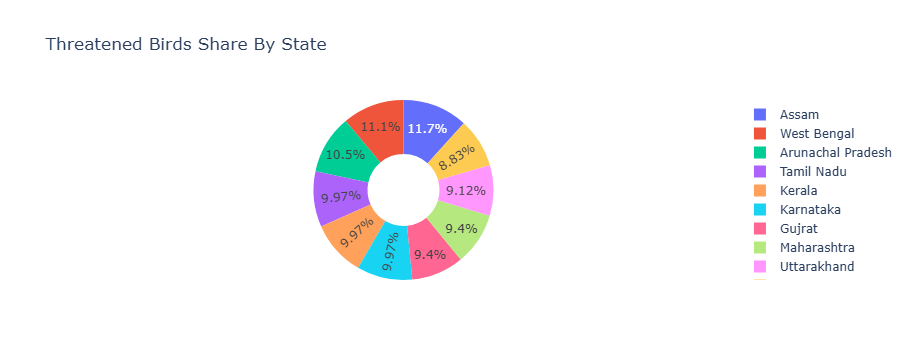

In [311]:
fig = px.pie(
    plot_df, values='Threatened_Count', names='State',
    title='Threatened Birds Share By State',
    hole=0.4  # donut
)
fig.show()


## Bird Type Distribution

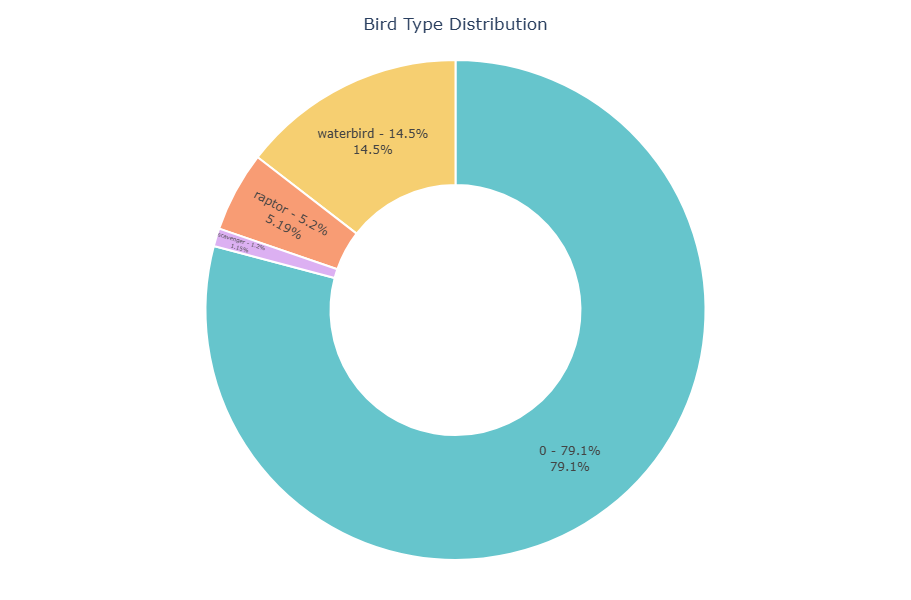

In [313]:
# Step 1: Count bird types
bird_type_count = birds_df['bird_type'].value_counts().reset_index()
bird_type_count.columns = ['bird_type', 'count']

# Step 2: Ensure correct type for concatenation
bird_type_count['bird_type'] = bird_type_count['bird_type'].astype(str)
bird_type_count['percentage'] = round((bird_type_count['count'] / bird_type_count['count'].sum()) * 100, 1)
bird_type_count['label'] = bird_type_count['bird_type'] + ' - ' + bird_type_count['percentage'].astype(str) + '%'

# Step 3: Donut chart
fig = px.pie(
    bird_type_count,
    names='label',
    values='count',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Bird Type Distribution'
)

# Step 4: Improve size and text layout
fig.update_traces(
    textinfo='percent+label',
    textposition='inside',
    marker=dict(line=dict(color='white', width=2))
)

fig.update_layout(
    showlegend=False,
    width=600,
    height=600,  # Perfect square to avoid squishing
    margin=dict(t=60, b=40, l=40, r=40),
    title_x=0.5,
)

fig.show()

## Bird Endemicity Type Distribution

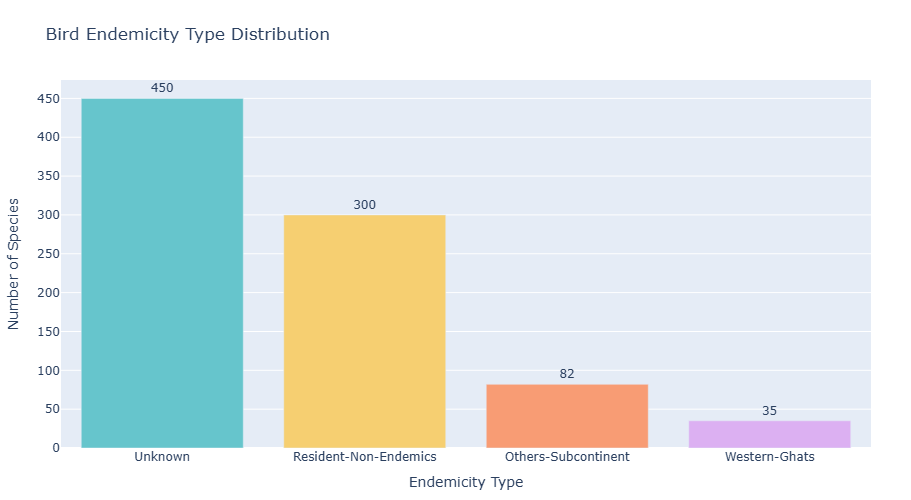

In [315]:
# Step 1: Get count from birds_df
end_df = birds_df['endemicity_type'].value_counts().reset_index()
end_df.columns = ['endemicity_type', 'count']

# Step 2: Plot bar chart
fig = px.bar(
    end_df,
    x='endemicity_type',
    y='count',
    text='count',
    color='endemicity_type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Bird Endemicity Type Distribution'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_title='Endemicity Type',
    yaxis_title='Number of Species',
    showlegend=False,
    height=500,
    width=800,
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()

### Diet vs Conservation Status

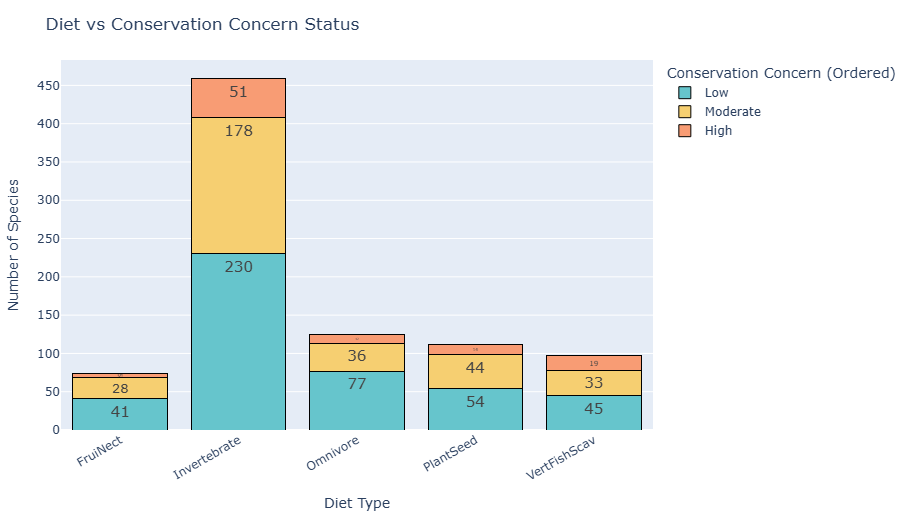

In [317]:
import plotly.express as px

# Group by diet and conservation concern
diet_df = birds_df.groupby(['diet', 'status_of_conservation_concern']).size().reset_index(name='count')

# Define the desired order
custom_order = ['Low', 'Moderate', 'High']

# Plot
fig = px.bar(
    diet_df,
    x='diet',
    y='count',
    color='status_of_conservation_concern',
    title='Diet vs Conservation Concern Status',
    barmode='stack',
    text='count',
    category_orders={'status_of_conservation_concern': custom_order},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Enhance appearance
fig.update_traces(textposition='inside', 
                  textfont_size=15,
                  marker_line_width=1,
    marker_line_color='black')

fig.update_layout(
    xaxis_title='Diet Type',
    yaxis_title='Number of Species',
    xaxis_tickangle=-30,
    height=520,
    width=880,
    legend_title_text='Conservation Concern (Ordered)',
    margin=dict(t=60, l=40, r=40, b=40)
)

fig.show()

#### Invertebrate feeders are the largest group but also have the most species at higher conservation risk. Fruit/Nectar feeders are least at risk, with no high concern species.

### Habitat Type vs IUCN Status

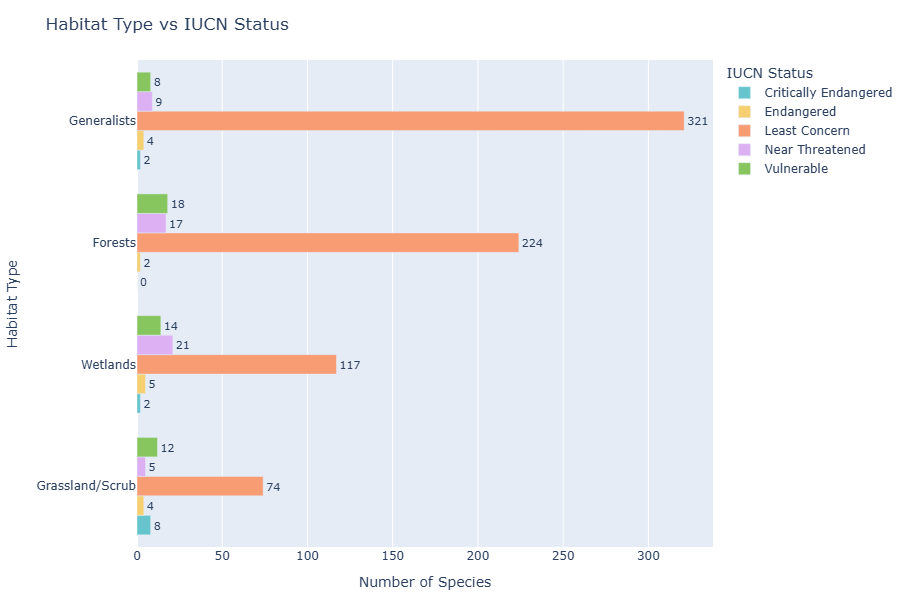

In [319]:

# Group data
habitat_df = birds_df.groupby(['habitat_type', 'iucn_status']).size().reset_index(name='count')

# Sort habitat types by total count for better visual flow
habitat_order = habitat_df.groupby('habitat_type')['count'].sum().sort_values(ascending=False).index.tolist()

# Plot
fig = px.bar(
    habitat_df, 
    y='habitat_type',
    x='count',
    color='iucn_status',
    barmode='group',
    orientation='h',
    title='Habitat Type vs IUCN Status',
    text='count',
    category_orders={'habitat_type': habitat_order},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Update layout and style
fig.update_traces(textposition='outside', textfont_size=11)

fig.update_layout(
    xaxis_title='Number of Species',
    yaxis_title='Habitat Type',
    legend_title='IUCN Status',
    bargap=0.2,
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=40),
    
)

fig.show()

## WLPA Schedule vs Conservation Concern

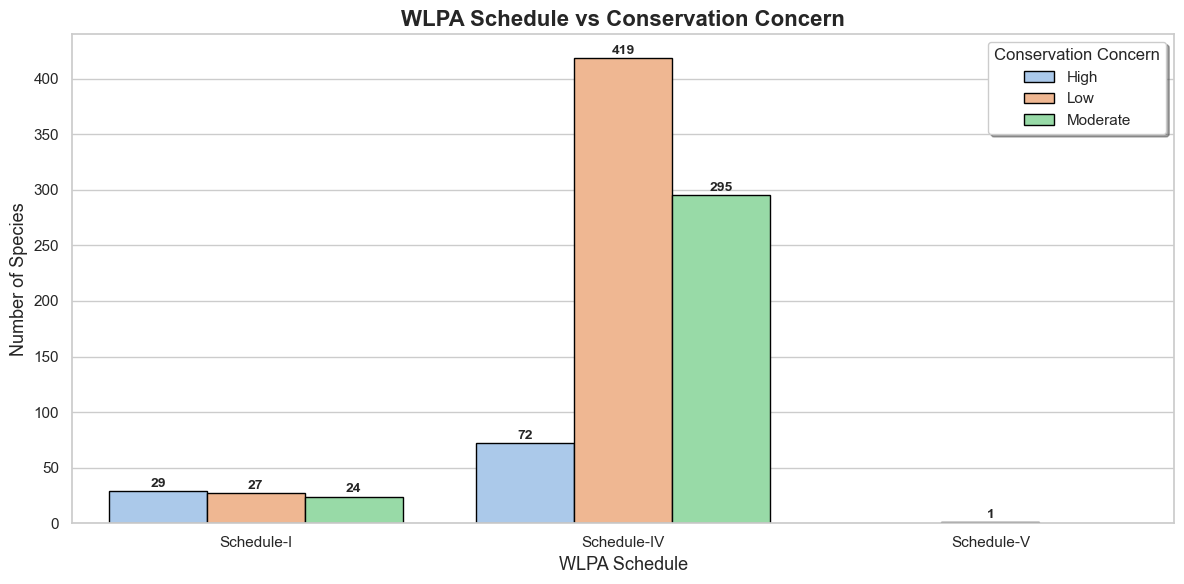

In [321]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Countplot
ax = sns.countplot(
    data=birds_df,
    x="wlpa_schedule",
    hue="status_of_conservation_concern",
    palette="pastel",  
    edgecolor="black"
)

# Titles and axis labels
plt.title("WLPA Schedule vs Conservation Concern", fontsize=16, fontweight='bold')
plt.xlabel("WLPA Schedule", fontsize=13)
plt.ylabel("Number of Species", fontsize=13)

# Rotate x-ticks if needed
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add counts above bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{int(height)}",
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

# Legend styling
plt.legend(
    title='Conservation Concern',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    frameon=True,
    shadow=True
)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

##### - Schedule I: Endangered species needing full protection.
##### - Schedule IV: Non-endangered but protected species.
##### - Schedule V: Vermin can be hunted without legal consequences.

#### Most bird species fall under Schedule-IV, with a large proportion at low or moderate conservation concern. Schedules I and V cover relatively few species, but Schedule-I contains a higher proportion of high-concern species compared to Schedule-IV.

## Distribution of Conservation Concern Levels Across All Habitats

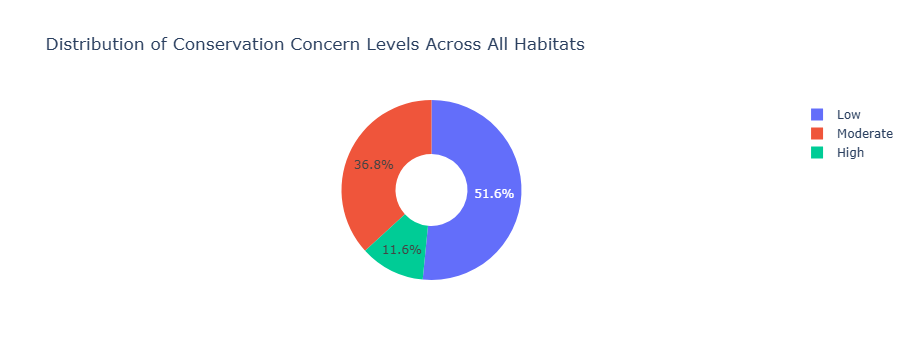

In [323]:
fig = px.pie(
    birds_df,
    names="status_of_conservation_concern",
    title="Distribution of Conservation Concern Levels Across All Habitats",
    hole=0.4,  # For a donut chart, remove or change to 0 for a normal pie
    color="status_of_conservation_concern"
)

fig.show()

#### Most species across all habitats are considered at low conservation risk, while relatively few are categorized as high risk, indicating that severe conservation concerns are less common overall.

# ML

# Decision Tree

In [325]:
# Drop unnecessary columns
birds_df = birds_df.drop(columns=['bird_name',*birds_df.columns[19:]])  


In [327]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   group                           867 non-null    category
 1   iucn_status                     867 non-null    category
 2   wlpa_schedule                   867 non-null    category
 3   analysed_long_term              867 non-null    int64   
 4   analysed_current                867 non-null    int64   
 5   long_term_trend                 867 non-null    float64 
 6   long_term_trend_ci              867 non-null    float64 
 7   current_annual_change           867 non-null    float64 
 8   current_annual_change_ci        867 non-null    float64 
 9   long_term_status                867 non-null    category
 10  current_status                  867 non-null    category
 11  distribution_status             867 non-null    category
 12  status_of_conservation

#### splitting the data

In [330]:
train_val_df, test_df = train_test_split(birds_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [332]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (519, 18)
val_df.shape: (174, 18)
test_df.shape: (174, 18)


In [334]:
target_col = 'status_of_conservation_concern'
train_df = train_df.dropna(subset=[target_col])

In [336]:
train_input = train_df.drop(columns=[target_col])
train_target = train_df[target_col]

In [338]:
val_input = val_df.drop(columns=[target_col])
val_target = val_df[target_col]

In [340]:
test_input = test_df.drop(columns=[target_col])
test_target = test_df[target_col]

In [342]:
numeric_cols = train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_input.select_dtypes('category').columns.tolist()

In [344]:
print(numeric_cols)

['analysed_long_term', 'analysed_current', 'long_term_trend', 'long_term_trend_ci', 'current_annual_change', 'current_annual_change_ci']


In [346]:
print(categorical_cols)

['group', 'iucn_status', 'wlpa_schedule', 'long_term_status', 'current_status', 'distribution_status', 'migratory_status', 'diet', 'habitat_type', 'endemicity_type', 'bird_type']


#### Label encoding on target data

In [349]:
target_encoder = LabelEncoder()
train_target = target_encoder.fit_transform(train_target)
val_target   = target_encoder.transform(val_target)
test_target  = target_encoder.transform(test_target)

### Scaling Numeric Features

In [352]:
from sklearn.preprocessing import MinMaxScaler

In [354]:
scaler = MinMaxScaler().fit(birds_df[numeric_cols])

In [356]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [358]:
val_input.describe().loc[['min','max']]

,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci
min,0.0,0.0,0.013264,0.000000,0.035249,0.000000
max,1.0,1.0,0.882111,0.590056,0.250246,0.300895


#### Encoding Categorical Data

In [361]:
from sklearn.preprocessing import OneHotEncoder

In [363]:
train_input[categorical_cols] = train_input[categorical_cols]
val_input[categorical_cols] = val_input[categorical_cols]
test_input[categorical_cols] = test_input[categorical_cols]

In [365]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore').fit(train_input[categorical_cols])

In [367]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [369]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

In [371]:
test_input

,group,iucn_status,wlpa_schedule,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci,long_term_status,...,habitat_type_Grassland/Scrub,habitat_type_Wetlands,endemicity_type_Others-Subcontinent,endemicity_type_Resident-Non-Endemics,endemicity_type_Unknown,endemicity_type_Western-Ghats,bird_type_0,bird_type_raptor,bird_type_scavenger,bird_type_waterbird
361,Drongos,Least Concern,Schedule-IV,1.0,1.0,0.247267,0.088938,0.114467,0.021650,Uncertain,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
422,Larks,Least Concern,Schedule-IV,1.0,1.0,0.312019,0.100946,0.106802,0.018234,Uncertain,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67,"Vultures, Hawks, and Allies",Least Concern,Schedule-I,1.0,1.0,0.386655,0.040632,0.103775,0.005363,Stable,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
779,"Herons, Ibis, and Allies",Least Concern,Schedule-IV,1.0,1.0,0.213062,0.096905,0.088766,0.022595,Uncertain,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
394,Shorebirds,Least Concern,Schedule-IV,1.0,1.0,0.128729,0.040182,0.056439,0.011137,Moderate Decline,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,"Tree-Babblers, Scimitar-Babblers, and Allies",Vulnerable,Schedule-IV,0.0,0.0,0.361693,0.000000,0.111686,0.000000,Data Deficient,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
542,Hornbills,Least Concern,Schedule-I,1.0,1.0,0.444468,0.185972,0.111405,0.024168,Uncertain,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
247,"Vultures, Hawks, and Allies",Endangered,Schedule-IV,1.0,1.0,0.140003,0.037912,0.070566,0.011630,Moderate Decline,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
760,Wagtails and Pipits,Least Concern,Schedule-IV,1.0,1.0,0.173506,0.198027,0.138736,0.079856,Uncertain,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [373]:
X_train = train_input[numeric_cols + encoded_cols]
X_val = val_input[numeric_cols + encoded_cols]
X_test = test_input[numeric_cols + encoded_cols]

### Training

In [376]:
from sklearn.tree import DecisionTreeClassifier

In [378]:
model = DecisionTreeClassifier(random_state = 42)

In [380]:
model.fit(X_train, train_target)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [382]:
val_preds = model.predict(X_val)

In [384]:
accuracy_score(val_target, val_preds)

0.9540229885057471

In [386]:
print(classification_report(val_target, val_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        23
           1       0.99      0.97      0.98        91
           2       0.95      0.95      0.95        60

    accuracy                           0.95       174
   macro avg       0.93      0.94      0.93       174
weighted avg       0.96      0.95      0.95       174



In [388]:
test_preds = model.predict(X_test)

In [390]:
accuracy_score(test_target, test_preds)

0.9425287356321839

In [394]:
print(classification_report(test_target, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.98      0.95      0.96        94
           2       0.89      0.97      0.93        59

    accuracy                           0.94       174
   macro avg       0.94      0.92      0.93       174
weighted avg       0.94      0.94      0.94       174



#### Feature Importance

In [396]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.0878538 ,
       0.00791018, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01153568,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [398]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending = False)

In [400]:
importance_df.head(10)

,feature,importance
94,current_status_Data Deficient,0.173133
88,long_term_status_Moderate Decline,0.147683
81,iucn_status_Least Concern,0.127149
91,long_term_status_Strong Decline,0.110345
104,distribution_status_Restricted,0.096456
4,current_annual_change,0.087854
100,current_status_Uncertain,0.070193
106,distribution_status_Very Restricted,0.048048
82,iucn_status_Near Threatened,0.035705
83,iucn_status_Vulnerable,0.026349


## Random Forest

In [403]:
model =RandomForestClassifier(n_jobs = -1, random_state = 42)

In [405]:
model.fit(X_train, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [407]:
model.score(X_val, val_target)

0.9540229885057471

In [413]:
print(classification_report(test_target, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.98      0.95      0.96        94
           2       0.89      0.97      0.93        59

    accuracy                           0.94       174
   macro avg       0.94      0.92      0.93       174
weighted avg       0.94      0.94      0.94       174



In [415]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [417]:
importance_df.head(10)

,feature,importance
2,long_term_trend,0.083152
5,current_annual_change_ci,0.071414
104,distribution_status_Restricted,0.063710
4,current_annual_change,0.063647
88,long_term_status_Moderate Decline,0.058287
100,current_status_Uncertain,0.053519
81,iucn_status_Least Concern,0.049448
3,long_term_trend_ci,0.046890
94,current_status_Data Deficient,0.040838
1,analysed_current,0.032827


## Making Prediction

In [420]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   group                           867 non-null    category
 1   iucn_status                     867 non-null    category
 2   wlpa_schedule                   867 non-null    category
 3   analysed_long_term              867 non-null    int64   
 4   analysed_current                867 non-null    int64   
 5   long_term_trend                 867 non-null    float64 
 6   long_term_trend_ci              867 non-null    float64 
 7   current_annual_change           867 non-null    float64 
 8   current_annual_change_ci        867 non-null    float64 
 9   long_term_status                867 non-null    category
 10  current_status                  867 non-null    category
 11  distribution_status             867 non-null    category
 12  status_of_conservation

In [422]:
bird_info = {
    'group': 'Waterbirds',
    'iucn_status': 'Least Concern',
    'wlpa_schedule': 'Schedule IV',
    'analysed_long_term': 1,
    'analysed_current': 1,
    'long_term_trend': -25.3,
    'long_term_trend_ci': 35.6,
    'current_annual_change': -2.7,
    'current_annual_change_ci': 20.8,
    'long_term_status': 'Decreasing',
    'current_status': 'Stable',
    'distribution_status': 'Widespread',
    'migratory_status': 'Migrant',
    'diet': 'Omnivore',
    'habitat_type': 'Wetland',
    'endemicity_type': 'Not Endemic',
    'bird_type': 'Waterbirds'
}
new_input_df = pd.DataFrame([bird_info])

In [424]:
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])# value b/w 0 and 1
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [426]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
#X_new_input

In [428]:
prediction = model.predict(X_new_input)[0]
pred_label = target_encoder.inverse_transform([prediction])[0]
print("Predicted Conservation Status:", pred_label)

Predicted Conservation Status: Low


### downloading encoder file for streamlit

In [232]:
# In Jupyter Notebook
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load data
birds_df = pd.read_excel("my_data.xlsx")

# Define columns
categorical_cols = ['group', 'migratory_status', 'diet', 'habitat_type',
                    'wlpa_schedule', 'iucn_status', 'long_term_status',
                    'current_status', 'distribution_status', 'endemicity_type', 'bird_type']
numeric_cols = ['analysed_long_term', 'analysed_current', 'long_term_trend', 'current_annual_change']
target_col = 'status_of_conservation_concern'

# Drop NA target
birds_df = birds_df.dropna(subset=[target_col])

# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(birds_df[target_col])
X = birds_df[categorical_cols + numeric_cols]

# Save target encoder
joblib.dump(target_encoder, "target_encoders5.pkl")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        max_depth=8, min_samples_leaf=3, class_weight={0: 5, 1: 1, 2: 1},
        random_state=42, n_jobs=-1
    ))
])

# Train model
pipeline.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipeline, "bird_conservation_model5.pkl")

print("✅ Model and encoder saved")


✅ Model and encoder saved


In [234]:
birds_df['status_of_conservation_concern'].value_counts()

status_of_conservation_concern
Low         447
Moderate    319
High        101
Name: count, dtype: int64